# Convolutional Neural Network on MNIST Dataset Using TensorFlow

<h2>Installing TensorFlow </h2>

We begin by installing TensorFlow version 2.9.0 and its required prerequistes.


In [3]:
# !pip install grpcio==1.24.3
# !pip install tensorflow==2.9.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 40.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 24.3.25
    Uninstalling flatbuffers-24.3.25:
      Successfully uninstalled flatbuffers-24.3.25
  Attempting uninstall: tensorboard-data-serve

In [62]:
import tensorflow as tf
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown('# <span style="color:red">'+string+'</span>'))

if not tf.__version__ == '2.9.1':
    printmd('<<<<<!!!!! ERROR !!!! please upgrade to TensorFlow 2.9.1, or restart your Kernel (Kernel->Restart & Clear Output)>>>>>')

### A Simple Model on MNIST Dataset

In [162]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [163]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [164]:
print(y_train[0:5])

[5 0 4 1 9]


In [165]:
print("categorical labels")
print(y_train[0:5])

# make labels one hot encoded
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

print("one hot encoded labels")
print(y_train[0:5])

categorical labels
[5 0 4 1 9]
one hot encoded labels
tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(5, 10), dtype=float32)


In [166]:
print("number of training examples:" , x_train.shape[0])
print("number of test examples:" , x_test.shape[0])

number of training examples: 60000
number of test examples: 10000


In [167]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(50)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(50)

<h3>Converting a 2D Image into a 1D Vector</h3>


In [168]:
# showing an example of the Flatten class and operation
from tensorflow.keras.layers import Flatten
flatten = Flatten(dtype='float32')

"original data shape"
print(x_train.shape)

"flattened shape"
print(flatten(x_train).shape)

(60000, 28, 28)
(60000, 784)


<h3>Assigning bias and weights to null tensors</h3>


In [169]:
# Weight tensor
W = tf.Variable(tf.zeros([784, 10], tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10], tf.float32))

<h3>Adding Weights and Biases to input</h3>


In [170]:
def forward(x):
    return tf.matmul(x,W) + b

<h3>Softmax Regression</h3>


In [171]:
# a sample softmax calculation on an input vector
vector = [10, 0.2, 8]
softmax = tf.nn.softmax(vector)
print("softmax calculation")
print(softmax.numpy())
print("verifying normalization")
print(tf.reduce_sum(softmax))
print("finding vector with largest value (label assignment)")
print("category", tf.argmax(softmax).numpy())

softmax calculation
[8.8075405e-01 4.8839214e-05 1.1919710e-01]
verifying normalization
tf.Tensor(1.0, shape=(), dtype=float32)
finding vector with largest value (label assignment)
category 0


In [172]:
def activate(x):
    return tf.nn.softmax(forward(x))

In [173]:
def model(x):
    x = flatten(x)
    return activate(x)

In [174]:
def cross_entropy(y_label, y_pred):
    return (-tf.reduce_sum(y_label * tf.math.log(y_pred + 1.e-10)))
# addition of 1e-10 to prevent errors in zero calculations

# current loss function for unoptimized model
cross_entropy(y_train, model(x_train)).numpy()

138155.12

In [175]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)

In [176]:
def train_step(x, y):
    with tf.GradientTape() as tape:
        #compute loss function
        current_loss = cross_entropy(y, model(x))
        # compute gradient of loss
        #(This is automatic! Even with specialized funcctions!)
        grads = tape.gradient(current_loss, [W,b])
        # Apply SGD step to our Variables W and b
        optimizer.apply_gradients(zip(grads, [W,b]))
    return current_loss.numpy()

<h3>Training batches</h3>


In [177]:
# zeroing out weights in case you want to run this cell multiple times
# Weight tensor
W = tf.Variable(tf.zeros([784, 10],tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10],tf.float32))

loss_values=[]
accuracies = []
epochs = 10

for i in range(epochs):
    j=0
    # each batch has 50 examples
    for x_train_batch, y_train_batch in train_ds:
        j+=1
        current_loss = train_step(x_train_batch, y_train_batch)
        if j%500==0: #reporting intermittent batch statistics
            print("epoch ", str(i), "batch", str(j), "loss:", str(current_loss) )

    # collecting statistics at each epoch...loss function and accuracy
    #  loss function
    current_loss = cross_entropy( y_train, model( x_train )).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(model(x_train), axis=1),
                                  tf.argmax(y_train, axis=1))
    #  accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch ", str(i), "loss", str(current_loss), "accuracy", str(accuracy) )


epoch  0 batch 500 loss: 308.78094
epoch  0 batch 1000 loss: 243.85347
end of epoch  0 loss 335063.8 accuracy 0.73728335
epoch  1 batch 500 loss: 270.43488
epoch  1 batch 1000 loss: 239.25098
end of epoch  1 loss 331978.1 accuracy 0.74156666
epoch  2 batch 500 loss: 290.95187
epoch  2 batch 1000 loss: 253.18973
end of epoch  2 loss 325348.25 accuracy 0.7507667
epoch  3 batch 500 loss: 292.71637
epoch  3 batch 1000 loss: 260.54138
end of epoch  3 loss 321318.7 accuracy 0.75453335
epoch  4 batch 500 loss: 289.2487
epoch  4 batch 1000 loss: 242.80728
end of epoch  4 loss 326882.06 accuracy 0.7500833
epoch  5 batch 500 loss: 280.16818
epoch  5 batch 1000 loss: 230.50214
end of epoch  5 loss 321615.75 accuracy 0.75516665
epoch  6 batch 500 loss: 277.45898
epoch  6 batch 1000 loss: 230.25873
end of epoch  6 loss 318383.2 accuracy 0.7596667
epoch  7 batch 500 loss: 296.34238
epoch  7 batch 1000 loss: 230.25853
end of epoch  7 loss 317834.22 accuracy 0.7604667
epoch  8 batch 500 loss: 294.9890

<h3>Test and Plots</h3>


In [178]:
correct_prediction_train = tf.equal(tf.argmax(model(x_train), axis=1),tf.argmax(y_train,axis=1))
accuracy_train = tf.reduce_mean(tf.cast(correct_prediction_train, tf.float32)).numpy()

correct_prediction_test = tf.equal(tf.argmax(model(x_test), axis=1),tf.argmax(y_test, axis=1))
accuracy_test = tf.reduce_mean(tf.cast(correct_prediction_test, tf.float32)).numpy()

print("training accuracy", accuracy_train)
print("test accuracy", accuracy_test)

training accuracy 0.7582833
test accuracy 0.7536


Text(0, 0.5, 'loss')

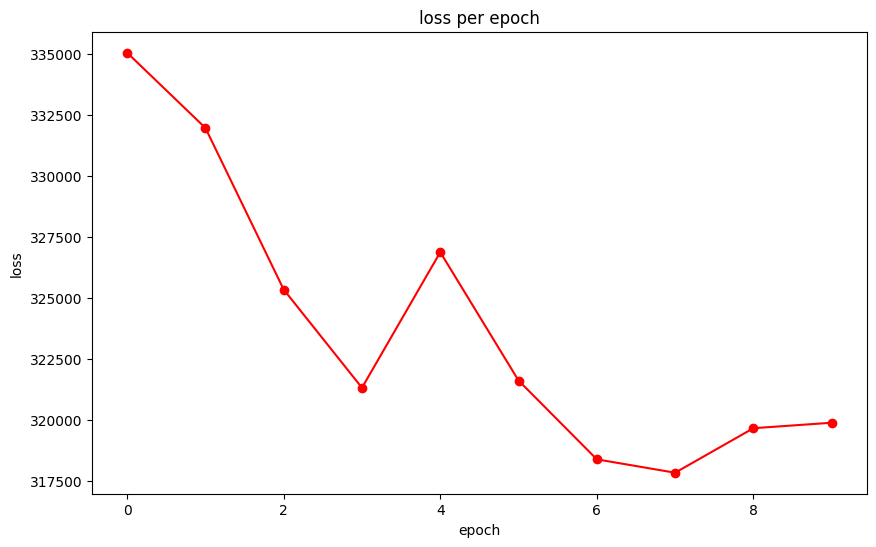

In [179]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
#print(loss_values)
plt.plot(loss_values,'-ro')
plt.title("loss per epoch")
plt.xlabel("epoch")
plt.ylabel("loss")

Text(0, 0.5, 'accuracy')

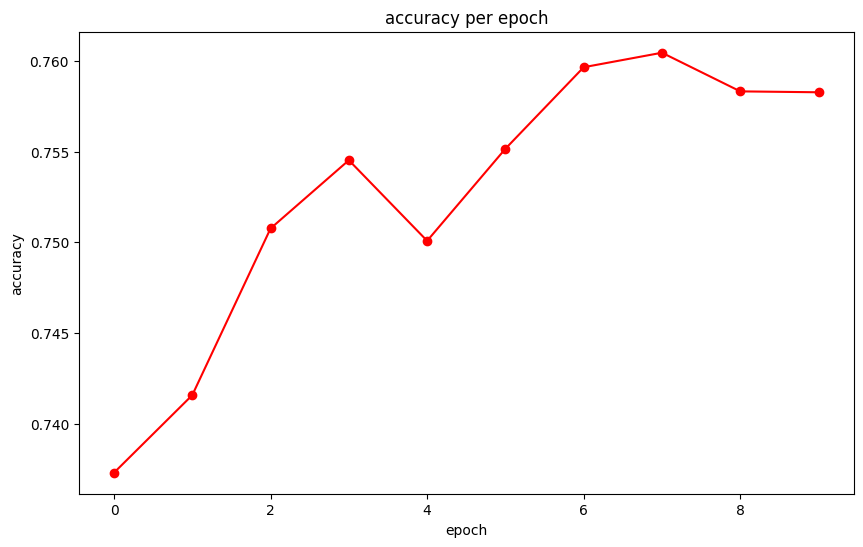

In [180]:
plt.plot(accuracies,'-ro')
plt.title("accuracy per epoch")
plt.xlabel("epoch")
plt.ylabel("accuracy")

### Building a More Complex Model on MNIST Dataset


In [181]:
width = 28 # width of the image in pixels
height = 28 # height of the image in pixels
flat = width * height # number of pixels in one image
class_output = 10 # number of possible classifications for the problem

In [182]:
x_image_train = tf.reshape(x_train, [-1,28,28,1])
x_image_train = tf.cast(x_image_train, 'float32')

x_image_test = tf.reshape(x_test, [-1,28,28,1])
x_image_test = tf.cast(x_image_test, 'float32')

#creating new dataset with reshaped inputs
train_ds2 = tf.data.Dataset.from_tensor_slices((x_image_train, y_train)).batch(50)
test_ds2 = tf.data.Dataset.from_tensor_slices((x_image_test, y_test)).batch(50)

In [183]:
x_image_train = tf.slice(x_image_train,[0,0,0,0],[10000, 28, 28, 1])
y_train = tf.slice(y_train,[0,0],[10000, 10])

In [184]:
W_conv1 = tf.Variable(tf.random.truncated_normal([5, 5, 1, 32], stddev=0.1, seed=0))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32])) # need 32 biases for 32 outputs

In [185]:
def convolve1(x):
    return (tf.nn.conv2d(x, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)

In [186]:
def h_conv1(x): return(tf.nn.relu(convolve1(x)))

In [187]:
def conv1(x):
    return tf.nn.max_pool(h_conv1(x), ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

In [188]:
W_conv2 = tf.Variable(tf.random.truncated_normal([5, 5, 32, 64], stddev=0.1, seed=1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64])) #need 64 biases for 64 outputs

In [189]:
def convolve2(x):
    return(
    tf.nn.conv2d(conv1(x), W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)

In [190]:
def h_conv2(x):  return tf.nn.relu(convolve2(x))

In [191]:
def conv2(x):
    return(
    tf.nn.max_pool(h_conv2(x), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME'))

In [192]:
def layer2_matrix(x): return tf.reshape(conv2(x), [-1, 7 * 7 * 64])

In [193]:
W_fc1 = tf.Variable(tf.random.truncated_normal([7 * 7 * 64, 1024], stddev=0.1, seed = 2))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024])) # need 1024 biases for 1024 outputs

In [194]:
def fcl(x): return tf.matmul(layer2_matrix(x), W_fc1) + b_fc1

In [195]:
def h_fc1(x): return tf.nn.relu(fcl(x))

In [196]:
keep_prob=0.5
def layer_drop(x): return tf.nn.dropout(h_fc1(x), rate=keep_prob)

In [197]:
W_fc2 = tf.Variable(tf.random.truncated_normal([1024, 10], stddev=0.1, seed = 2)) #1024 neurons
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10])) # 10 possibilities for digits [0,1,2,3,4,5,6,7,8,9]

In [198]:
def fc(x): return tf.matmul(layer_drop(x), W_fc2) + b_fc2

In [199]:
def y_CNN(x): return tf.nn.softmax(fc(x))

Model Training

In [200]:
def cross_entropy(y_label, y_pred):
    return (-tf.reduce_sum(y_label * tf.math.log(y_pred + 1.e-10)))

In [201]:
optimizer = tf.keras.optimizers.Adam(1e-4)

In [202]:
variables = [W_conv1, b_conv1, W_conv2, b_conv2,
             W_fc1, b_fc1, W_fc2, b_fc2, ]

def train_step(x, y):
    with tf.GradientTape() as tape:
        current_loss = cross_entropy( y, y_CNN( x ))
        grads = tape.gradient( current_loss , variables )
        optimizer.apply_gradients( zip( grads , variables ) )
        return current_loss.numpy()


In [203]:
"""results = []
increment = 1000
for start in range(0,60000,increment):
    s = tf.slice(x_image_train,[start,0,0,0],[start+increment-1, 28, 28, 1])
    t = y_CNN(s)
    #results.append(t)
"""

'results = []\nincrement = 1000\nfor start in range(0,60000,increment):\n    s = tf.slice(x_image_train,[start,0,0,0],[start+increment-1, 28, 28, 1])\n    t = y_CNN(s)\n    #results.append(t)\n'

In [204]:
correct_prediction = tf.equal(tf.argmax(y_CNN(x_image_train), axis=1), tf.argmax(y_train, axis=1))

In [205]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float32'))

In [206]:
loss_values=[]
accuracies = []
epochs = 2

for i in range(epochs):
    j=0
    # each batch has 50 examples
    for x_train_batch, y_train_batch in train_ds2:
        j+=1
        current_loss = train_step(x_train_batch, y_train_batch)
        if j%50==0: #reporting intermittent batch statistics
            correct_prediction = tf.equal(tf.argmax(y_CNN(x_train_batch), axis=1),
                                  tf.argmax(y_train_batch, axis=1))
            #  accuracy
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
            print("epoch ", str(i), "batch", str(j), "loss:", str(current_loss),
                     "accuracy", str(accuracy))

    current_loss = cross_entropy( y_train, y_CNN( x_image_train )).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(y_CNN(x_image_train), axis=1),
                                  tf.argmax(y_train, axis=1))
    #  accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch ", str(i), "loss", str(current_loss), "accuracy", str(accuracy) )

epoch  0 batch 50 loss: 112.15582 accuracy 0.42
epoch  0 batch 100 loss: 56.965668 accuracy 0.74
epoch  0 batch 150 loss: 43.78167 accuracy 0.78
epoch  0 batch 200 loss: 23.004477 accuracy 0.84
epoch  0 batch 250 loss: 32.679985 accuracy 0.9
epoch  0 batch 300 loss: 17.987942 accuracy 0.86
epoch  0 batch 350 loss: 19.680965 accuracy 0.82
epoch  0 batch 400 loss: 17.999876 accuracy 0.92
epoch  0 batch 450 loss: 22.588928 accuracy 0.8
epoch  0 batch 500 loss: 17.796764 accuracy 0.9
epoch  0 batch 550 loss: 12.931418 accuracy 0.9
epoch  0 batch 600 loss: 25.082817 accuracy 0.82
epoch  0 batch 650 loss: 19.455143 accuracy 0.9
epoch  0 batch 700 loss: 5.1689115 accuracy 0.96
epoch  0 batch 750 loss: 17.298603 accuracy 0.92
epoch  0 batch 800 loss: 15.342389 accuracy 0.96
epoch  0 batch 850 loss: 17.340273 accuracy 0.88
epoch  0 batch 900 loss: 11.326093 accuracy 0.94
epoch  0 batch 950 loss: 17.251293 accuracy 0.92
epoch  0 batch 1000 loss: 6.6450706 accuracy 0.92
epoch  0 batch 1050 loss: 

<a id="ref9"></a>
<h2>Evaluate the model</h2>


In [207]:
j=0
acccuracies=[]
# evaluate accuracy by batch and average...reporting every 100th batch
for x_train_batch, y_train_batch in train_ds2:
        j+=1
        correct_prediction = tf.equal(tf.argmax(y_CNN(x_train_batch), axis=1),
                                  tf.argmax(y_train_batch, axis=1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
        accuracies.append(accuracy)
        if j%100==0:
            print("batch", str(j), "accuracy", str(accuracy) )
import numpy as np
print("accuracy of entire set", str(np.mean(accuracies)))

batch 100 accuracy 0.94
batch 200 accuracy 0.98
batch 300 accuracy 1.0
batch 400 accuracy 0.98
batch 500 accuracy 0.98
batch 600 accuracy 0.96
batch 700 accuracy 1.0
batch 800 accuracy 1.0
batch 900 accuracy 0.98
batch 1000 accuracy 1.0
batch 1100 accuracy 0.96
batch 1200 accuracy 1.0
accuracy of entire set 0.9667295


<h3>Visualization</h3>


In [208]:
kernels = tf.reshape(tf.transpose(W_conv1, perm=[2, 3, 0,1]),[32, -1])

--2024-10-15 14:32:52--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork/labs/Week2/data/utils.py
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5097 (5.0K) [text/x-python]
Saving to: ‘utils1.py’

utils1.py           100%[===================>]   4.98K  --.-KB/s    in 0s      

2024-10-15 14:32:53 (2.00 GB/s) - ‘utils1.py’ saved [5097/5097]



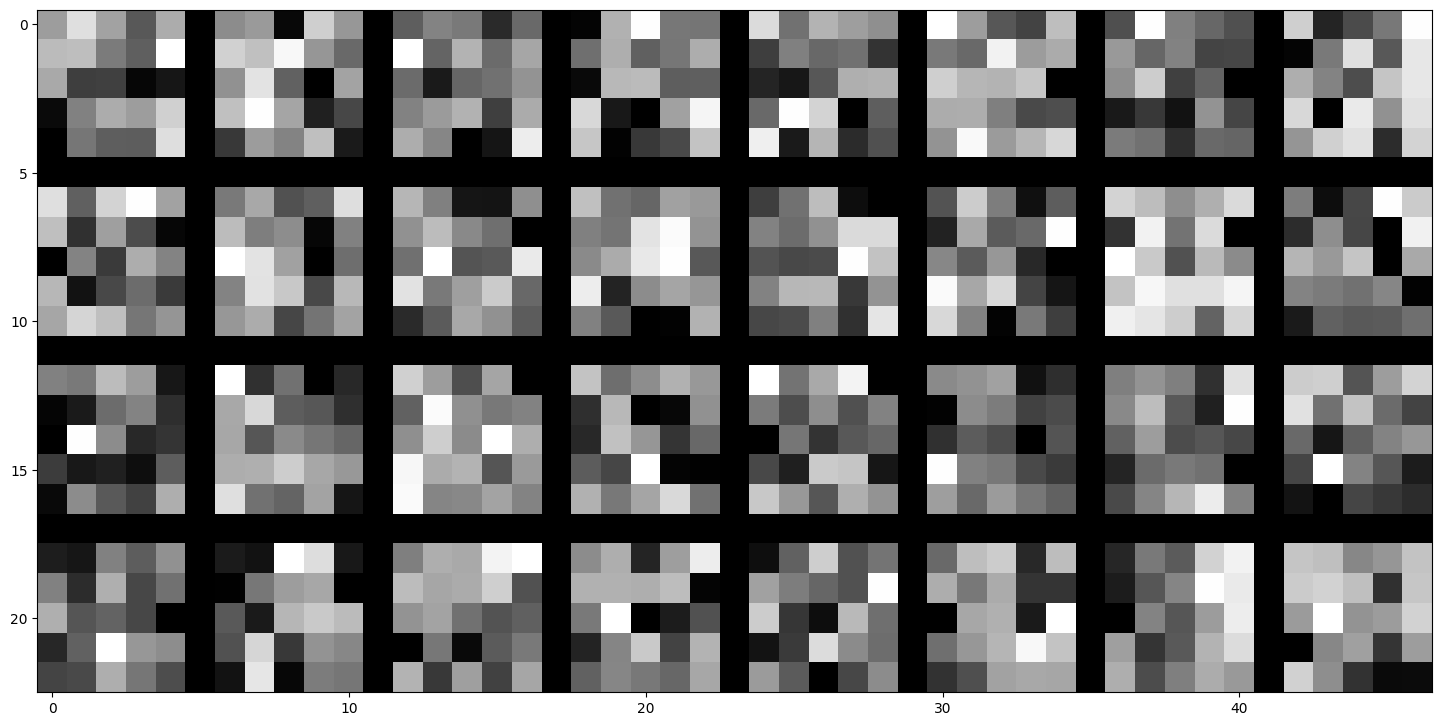

In [209]:
!wget --output-document utils1.py https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork/labs/Week2/data/utils.py
import utils1
import imp
imp.reload(utils1)
from utils1 import tile_raster_images
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
image = Image.fromarray(tile_raster_images(kernels.numpy(), img_shape=(5, 5) ,tile_shape=(4, 8), tile_spacing=(1, 1)))
### Plot image
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')

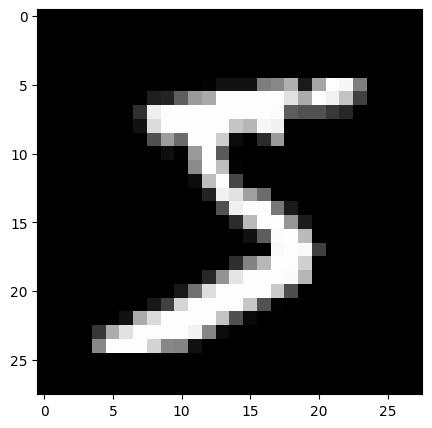

In [210]:
import numpy as np
plt.rcParams['figure.figsize'] = (5.0, 5.0)
sampleimage = [x_image_train[0]]
plt.imshow(np.reshape(sampleimage,[28,28]), cmap="gray")

<ipython-input-211-e4915dc0847d>:9: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  n_rows = np.math.ceil(filters / n_columns) + 1


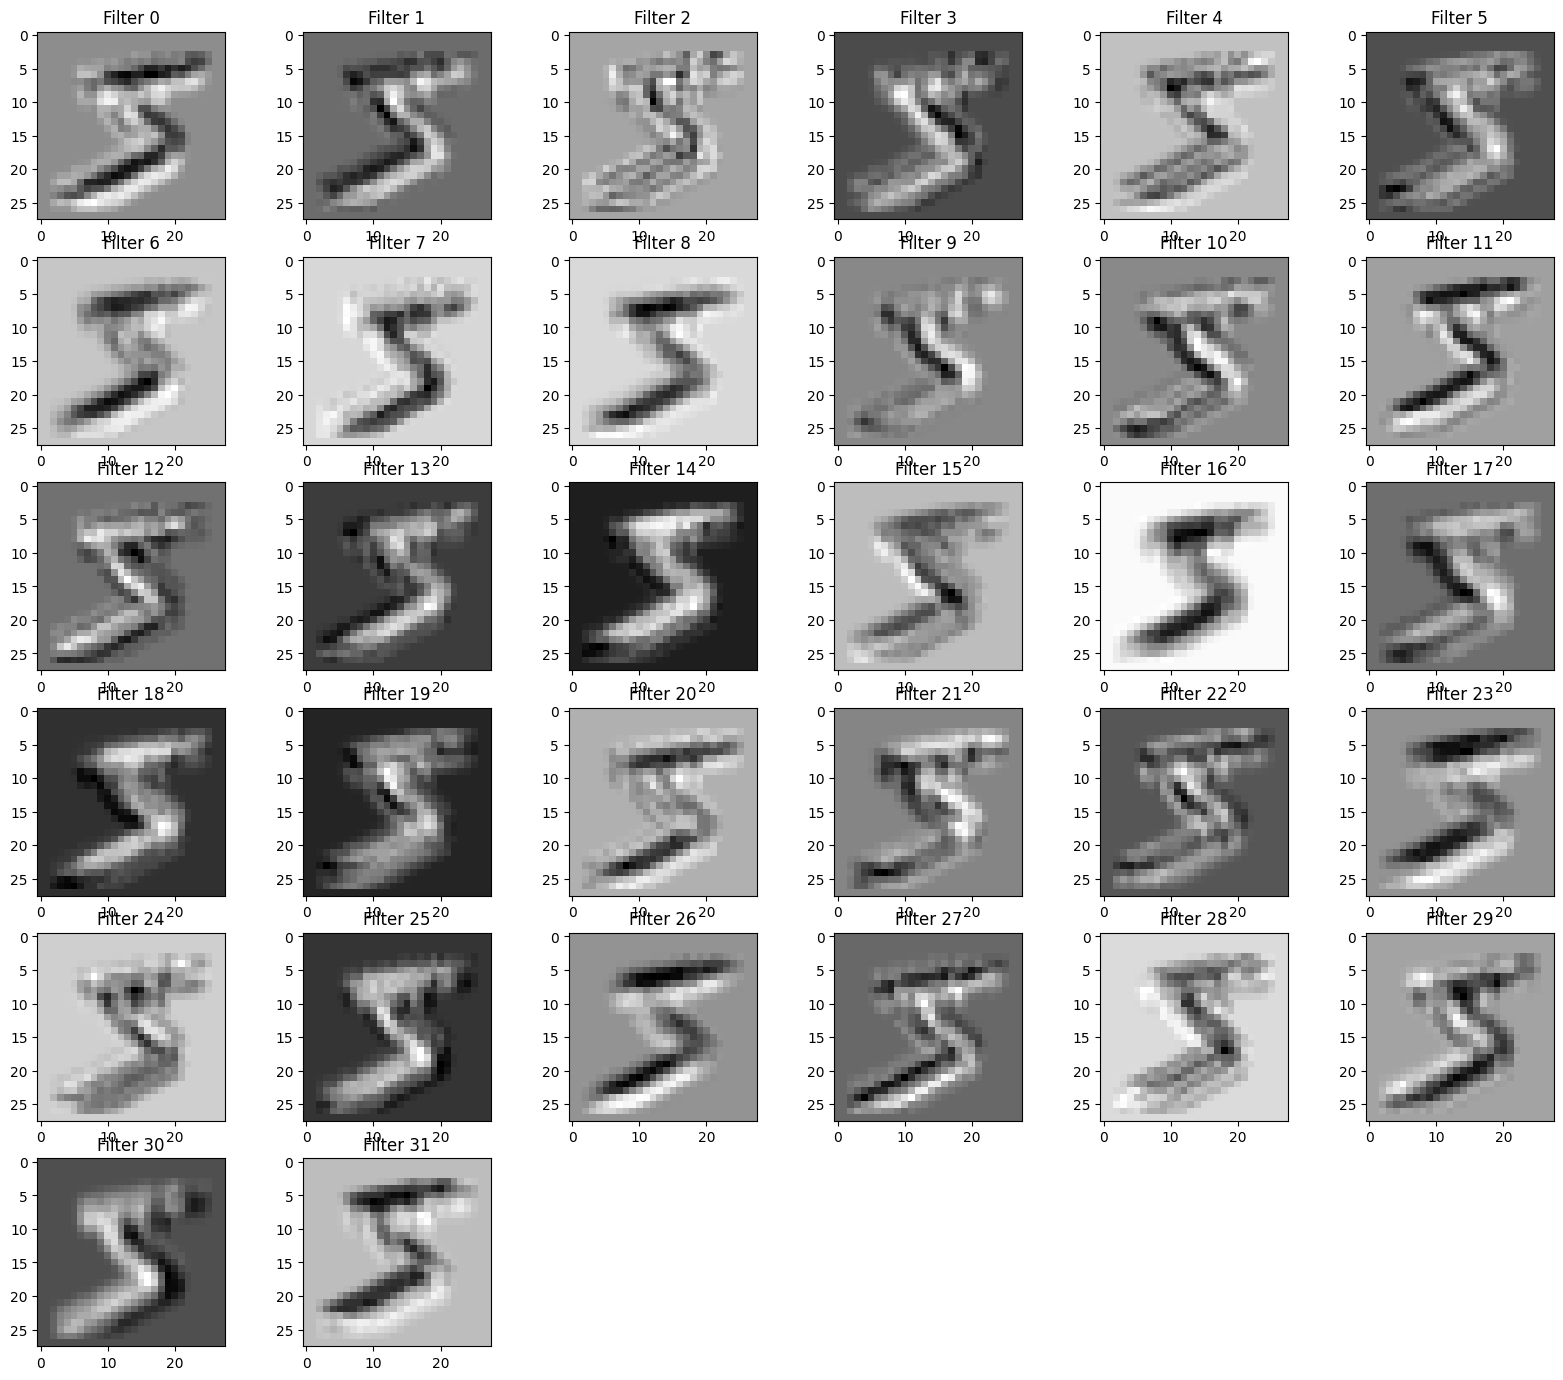

In [211]:
#ActivatedUnits = sess.run(convolve1,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
keep_prob=1.0
sampleimage = np.array(sampleimage)
ActivatedUnits = convolve1(sampleimage)

filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 6
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

<ipython-input-212-5ece6de60453>:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  n_rows = np.math.ceil(filters / n_columns) + 1


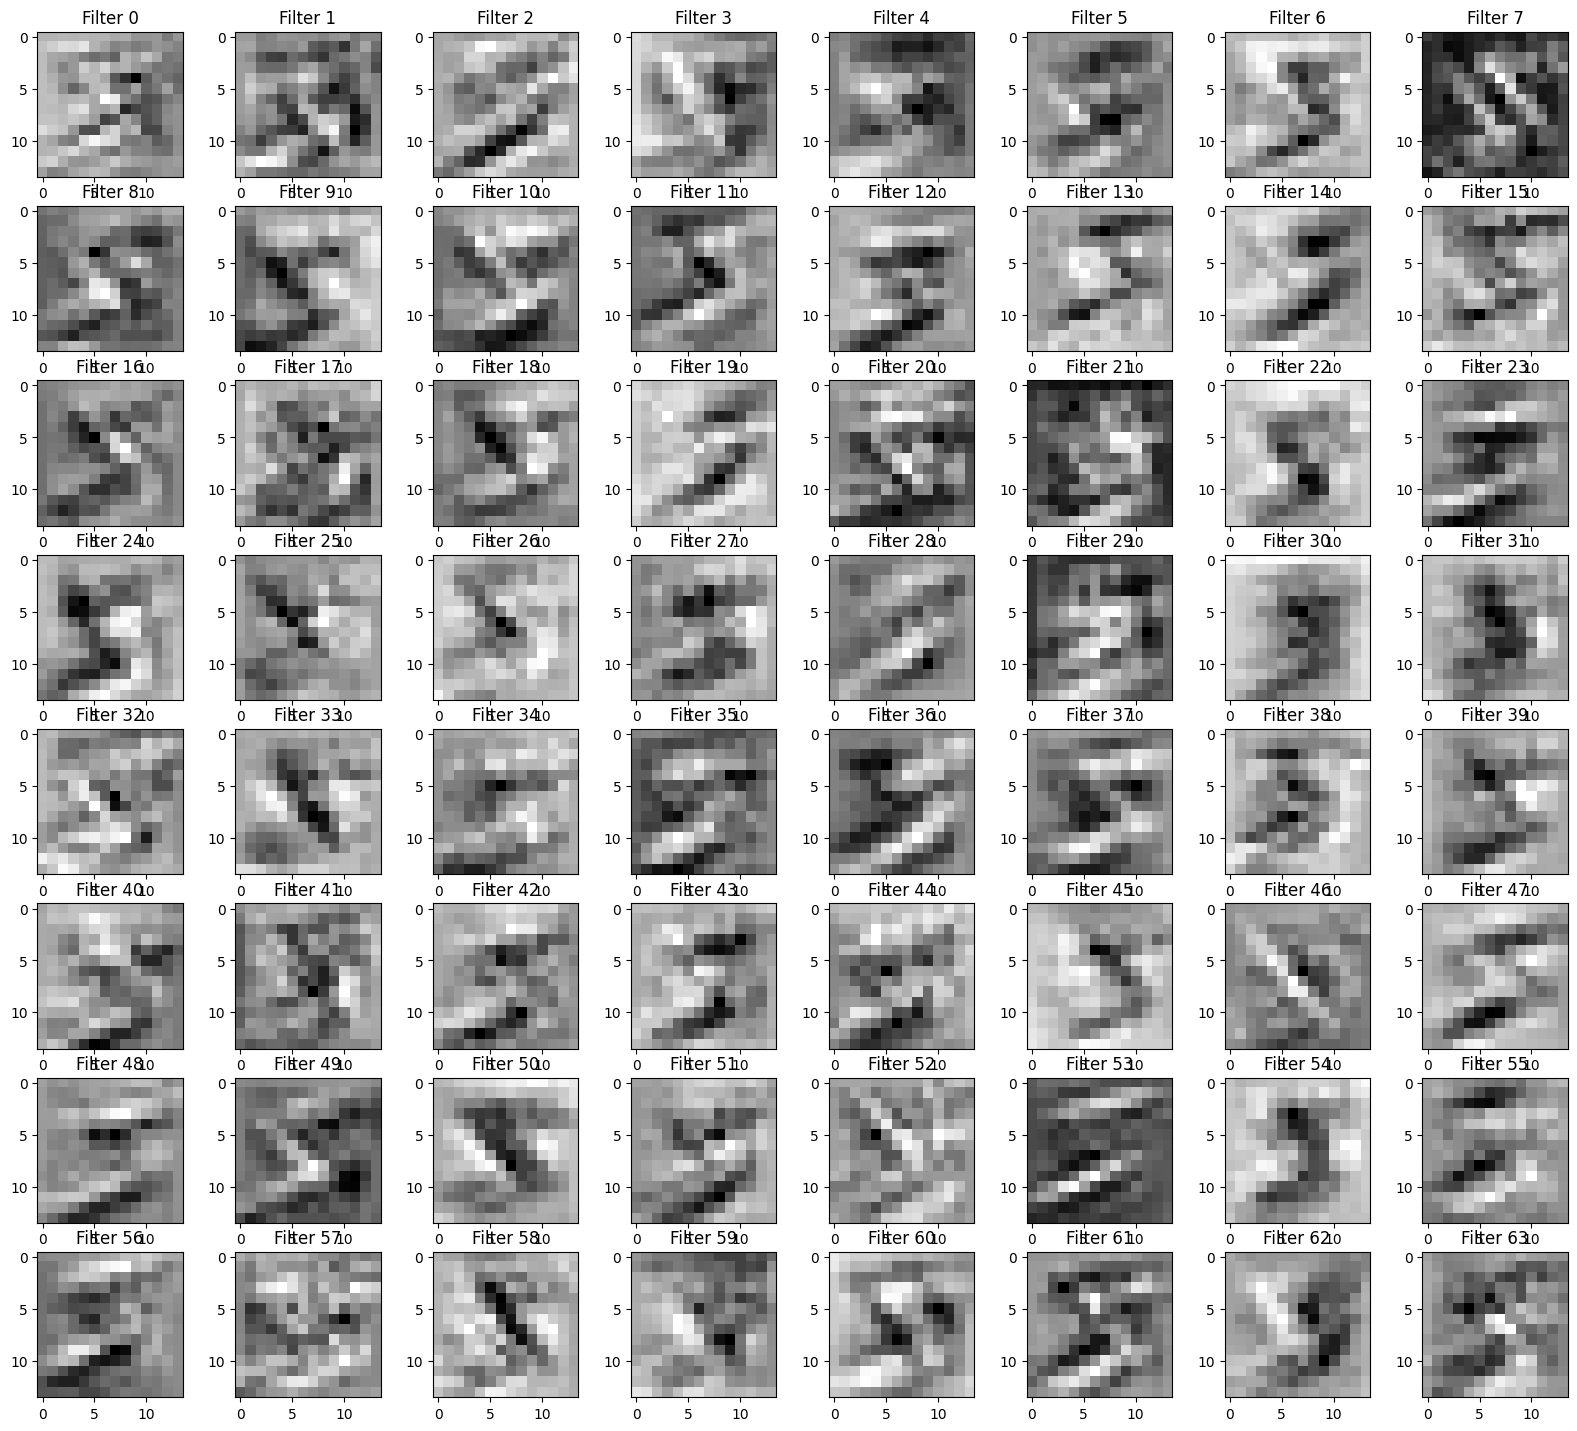

In [212]:
#ActivatedUnits = sess.run(convolve2,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
sampleimage = np.array(sampleimage)
ActivatedUnits = convolve2(sampleimage)
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 8
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")